In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df_mobil = pd.read_csv('CarPrice.csv')
df_mobil


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [16]:
# cek data kosong
print("cek data kosong => no. 3\n")
df_mobil.isnull().sum()

cek data kosong => no. 3



car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
# Tampilkan nilai count, mean, std, nilai min, kuartil 1 (25%), median (50%), kuartil 3 (75%), nilai max pada dataset tersebut sehingga hasilnya pada gambar di bawah ini.
print("Menampilkan nilai => no. 4\n")
df_mobil.describe()

Menampilkan nilai => no. 4



,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [18]:
print("Menamplkan tipe data => no. 5\n")
df_mobil.dtypes

Menamplkan tipe data => no. 5



car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Menampilkan grafik distribusi harga mobil => no. 6



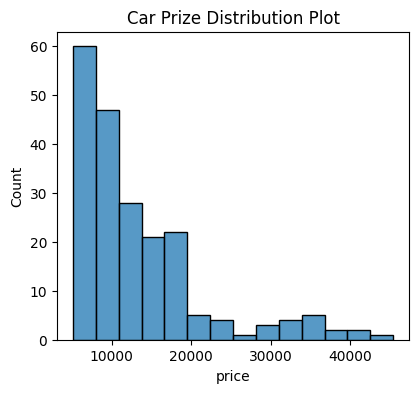

In [19]:
print("Menampilkan grafik distribusi harga mobil => no. 6\n")
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Car Prize Distribution Plot')
sns.histplot(df_mobil.price)

plt.show()

Menampilkan grafik harga mobil yang ada dalam dataset => no. 7



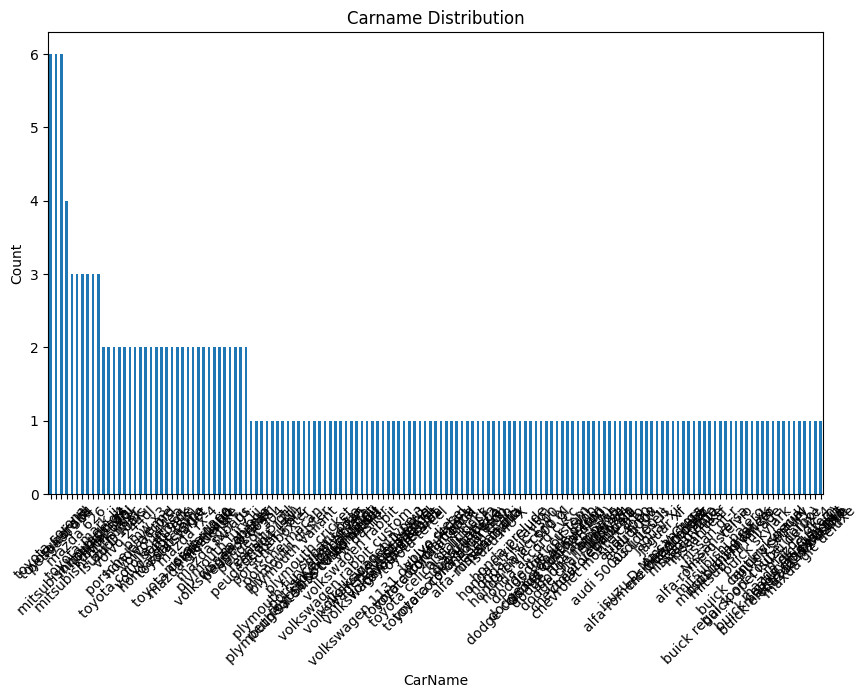

In [20]:
print("Menampilkan grafik harga mobil yang ada dalam dataset => no. 7\n")
car_counts = df_mobil['CarName'].value_counts()

plt.figure(figsize=(10, 6))
car_counts.plot(kind="bar")
plt.title("Carname Distribution")
plt.xlabel("CarName")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()

Menampilkan 10 nama mobil terbanyak dalam dataset => no. 8



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'toyota corona'),
  Text(1, 0, 'toyota corolla'),
  Text(2, 0, 'peugeot 504'),
  Text(3, 0, 'subaru dl'),
  Text(4, 0, 'mitsubishi mirage g4'),
  Text(5, 0, 'mazda 626'),
  Text(6, 0, 'toyota mark ii'),
  Text(7, 0, 'mitsubishi outlander'),
  Text(8, 0, 'mitsubishi g4'),
  Text(9, 0, 'honda civic')])

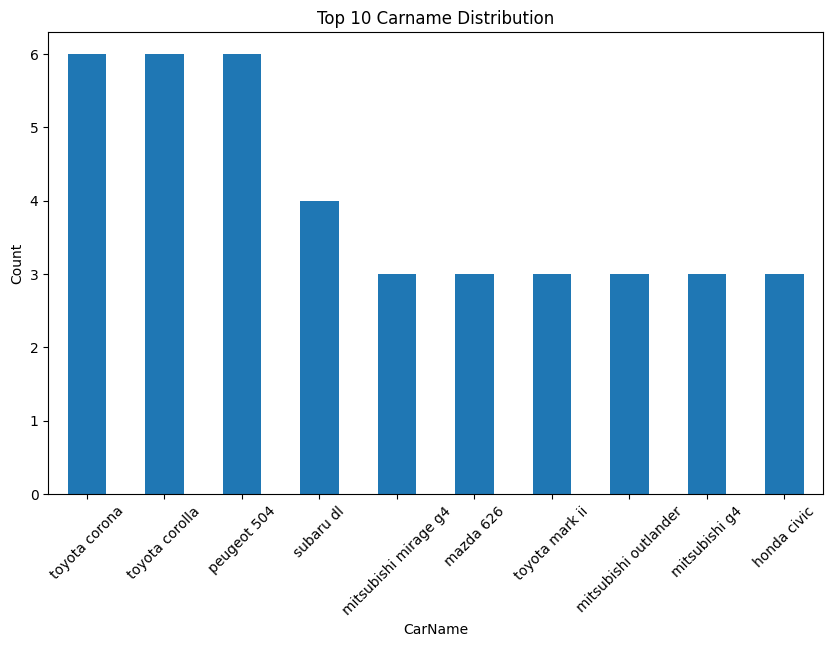

In [21]:
print("Menampilkan 10 nama mobil terbanyak dalam dataset => no. 8\n")
car_counts = df_mobil['CarName'].value_counts().head(10)

plt.figure(figsize=(10, 6))
car_counts.plot(kind="bar")
plt.title("Top 10 Carname Distribution")
plt.xlabel("CarName")
plt.ylabel("Count")
plt.xticks(rotation=45)

Menampilkan wordCloud nama nama mobil => no. 9



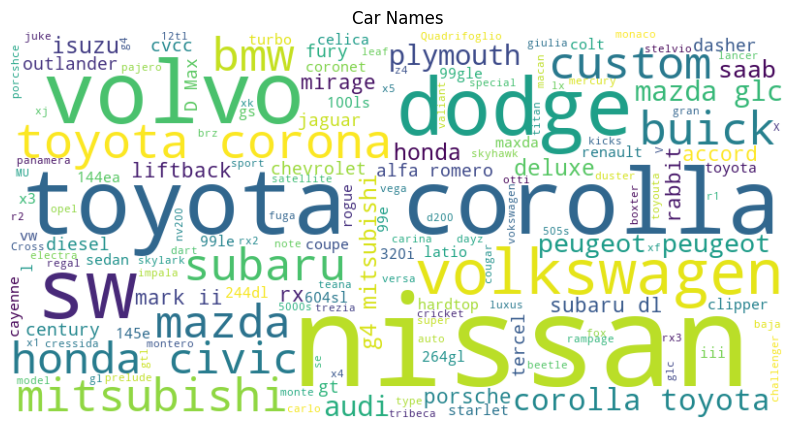

In [22]:
print("Menampilkan wordCloud nama nama mobil => no. 9\n")
text = ' '.join(df_mobil['CarName'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Car Names')
plt.show()

### 10. Tampilkan sebuah scatter plot untuk menunjukkan hubungan antara data highwaympg dengan price pada dataset. Jelaskan arti dari scatter plot tersebut.

Menampilkan scatter plot => no. 10



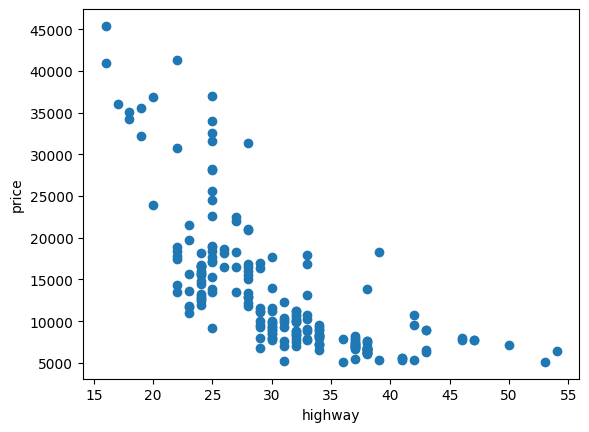


Scatter plot diatas menampilkan sumbu x yg menampilkan highwaympg dan 
sumbu y yg menampilkan price, dan meninjukkan sebaran titik titik atau 
data dari hubungan harga mobil dan konsumsi bahan bakar. Semakin tinggi
harga mobil atau konsumsi bahan bakar, maka titik akan berada dibawah
dalam grafik tersebut. Dan sebaliknya


In [23]:
print("Menampilkan scatter plot => no. 10\n")
plt.scatter(df_mobil['highwaympg'], df_mobil['price'])
plt.xlabel('highway')
plt.ylabel('price')
plt.show()

print("""
Scatter plot diatas menampilkan sumbu x yg menampilkan highwaympg dan 
sumbu y yg menampilkan price, dan meninjukkan sebaran titik titik atau 
data dari hubungan harga mobil dan konsumsi bahan bakar. Semakin tinggi
harga mobil atau konsumsi bahan bakar, maka titik akan berada dibawah
dalam grafik tersebut. Dan sebaliknya""")

# B. Pemodelan Machine Learning

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("""
Tentukan variable independent (X) sebagai inputan yakni 'highwaympg', 
'curbweight', dan 'horsepower', dan variable dependent (y) sebagai output 
dari model ini yakni 'price' ===> no. 12\n""")
X = df_mobil[['highwaympg','curbweight','horsepower']]
y = df_mobil['price']

print("Bagi data menjadi data pelatihan dan data pengujian ===> no. 13")
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Tentukan variable independent (X) sebagai inputan yakni 'highwaympg', 
'curbweight', dan 'horsepower', dan variable dependent (y) sebagai output 
dari model ini yakni 'price' ===> no. 12

Bagi data menjadi data pelatihan dan data pengujian ===> no. 13


Buat objek model menggunakan class LinearRegression, dan lakukan pelatihan ===> no. 14 

Lakukan prediksi menggunakan model regresi linear ===> no. 15


Visualisasikan hasil prediksi dari model regresi linear tersebut.
Pada sumbu x (X_test.iloc[:, 0]), digunakan nilai 'highwaympg'
dari data pengujian (X_test), dan pada sumbu y (model_regresi_pred),
digunakan nilai prediksi harga mobil (price) yang dihasilkan oleh model.
Jelaskan perbandingan hasil scatter plot ini dengan no 10. ===> no. 16


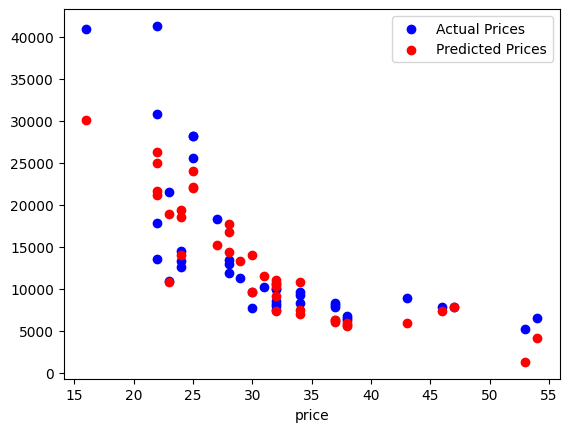


Perbedaan dengan scatter plot sebelumnya adalah pada
data yang ditampilkan. Scatter plot no. 10 menggunakan seluruh data 
'highwaympg' dan 'price' dari DataFrame, sedangkan scatter plot ini
hanya menampilkan data uji ('X_test') dan hasil prediksi dari model
regresi linear untuk fitur 'highwaympg'.



In [25]:
print("Buat objek model menggunakan class LinearRegression, dan lakukan pelatihan ===> no. 14 \n")
model_regresi = LinearRegression()
model_regresi.fit(X_train, y_train)

print("Lakukan prediksi menggunakan model regresi linear ===> no. 15\n")
model_regresi_pred = model_regresi.predict(X_test)

print("""
Visualisasikan hasil prediksi dari model regresi linear tersebut.
Pada sumbu x (X_test.iloc[:, 0]), digunakan nilai 'highwaympg'
dari data pengujian (X_test), dan pada sumbu y (model_regresi_pred),
digunakan nilai prediksi harga mobil (price) yang dihasilkan oleh model.
Jelaskan perbandingan hasil scatter plot ini dengan no 10. ===> no. 16""")
plt.scatter(X_test.iloc[:, 0], y_test, label = 'Actual Prices', color='blue')
plt.scatter(X_test.iloc[:, 0], model_regresi_pred, label='Predicted Prices', color='red')
plt.xlabel('highwaympg')
plt.xlabel('price')
plt.legend()
plt.show()

print("""
Perbedaan dengan scatter plot sebelumnya adalah pada
data yang ditampilkan. Scatter plot no. 10 menggunakan seluruh data 
'highwaympg' dan 'price' dari DataFrame, sedangkan scatter plot ini
hanya menampilkan data uji ('X_test') dan hasil prediksi dari model
regresi linear untuk fitur 'highwaympg'.
""")


In [26]:
print("===> no. 17 <===\n")
X = np.array([[32, 2338, 75]])
harga_X = model_regresi.predict(X)
harga_X

print("Ubah aray menjadi int ===> no. 18")
harga_X.astype(int)

===> no. 17 <===

Ubah aray menjadi int ===> no. 18


c:\Users\Zidni Zidan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8860])

In [27]:
print("Evaluasi untuk mengetahui nilai MAE, MSE dan RMSE ===> no. 19\n")
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, model_regresi_pred)
print("MAE= ", mae)

mse = mean_squared_error(y_test, model_regresi_pred)
print("MSE= ", mse)

rmse = np.sqrt(mse)
print("RMSE= ", rmse)

print("""
MAE = mengindikasikan bahwa rata-rata kesalahan prediksi model 
      dalam memperkirakan harga mobil berdasarkan efisiensi 
      bahan bakar adalah sekitar 3028.21
MSE = Nilai MSE yang tinggi, menunjukkan bahwa terdapat variasi
      yang signifikan antara nilai aktual dan nilai prediksi,
      dengan fokus pada perbedaan yang lebih besar.
RMSE = memberikan gambaran seberapa besar kesalahan prediksi 
       dalam satuan yang sama dengan variabel dependen (harga mobil).
       RMSE sebesar 4202.31 unit mata uang menunjukkan bahwa 
       kesalahan prediksi rata-rata berkisar sekitar 4202.31 unit mata uang.
""")

Evaluasi untuk mengetahui nilai MAE, MSE dan RMSE ===> no. 19

MAE=  3028.2135777187264
MSE=  17659419.43576349
RMSE=  4202.311201679796

MAE = mengindikasikan bahwa rata-rata kesalahan prediksi model 
      dalam memperkirakan harga mobil berdasarkan efisiensi 
      bahan bakar adalah sekitar 3028.21
MSE = Nilai MSE yang tinggi, menunjukkan bahwa terdapat variasi
      yang signifikan antara nilai aktual dan nilai prediksi,
      dengan fokus pada perbedaan yang lebih besar.
RMSE = memberikan gambaran seberapa besar kesalahan prediksi 
       dalam satuan yang sama dengan variabel dependen (harga mobil).
       RMSE sebesar 4202.31 unit mata uang menunjukkan bahwa 
       kesalahan prediksi rata-rata berkisar sekitar 4202.31 unit mata uang.



In [28]:
import pickle
filename = 'modelPrediksi.sav'
pickle.dump(model_regresi, open(filename, 'wb'))